In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import sys
import seaborn as sns

sys.path.append(r"D:\github\ripple_heterogeneity\python")
import functions, loading, assembly_run

sys.path.append(r"D:\github\neurocode\reactivation\assemblies")
import assembly

import nelpy as nel
import nelpy.plotting as npl

import itertools
import os

import pickle
from scipy import stats
import glob
from scipy.stats import chisquare

from matplotlib.ticker import AutoMinorLocator
from mpl_toolkits.axes_grid1.inset_locator import inset_axes
import matplotlib

import random
from tqdm import tqdm


C:\Users\Cornell\anaconda3\envs\ripple_diversity\lib\site-packages\nelpy\plotting\decoding.py:9: MatplotlibDeprecationWarning: 
The mpl_toolkits.axes_grid module was deprecated in Matplotlib 2.1 and will be removed two minor releases later. Use mpl_toolkits.axes_grid1 and mpl_toolkits.axisartist, which provide the same functionality instead.


## Make pre/task/post assembly activation strength for novel sessions

In [3]:
import importlib
import assembly_activation
importlib.reload(assembly_activation)
importlib.reload(loading)

save_path_assembly = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly'
sessions = glob.glob(save_path_assembly +os.sep+ '*.pkl')
sessions = [string for string in sessions if 'GrosmarkAD' in string]

basepath = []
for session in sessions:
    with open(session, 'rb') as f:
        results = pickle.load(f)
    basepath.append(results['basepath'])

temp_df = pd.DataFrame()
temp_df['basepath'] = basepath    

save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\assembly_activation'

assembly_activation.assembly_run_activation(temp_df,save_path,save_path_assembly,parallel=False)

Z:\Data\GrosmarkAD\Achilles\Achilles_10252013
Z:\Data\GrosmarkAD\Achilles\Achilles_11012013
Z:\Data\GrosmarkAD\Buddy\Buddy_06272013
Z:\Data\GrosmarkAD\Cicero\Cicero_09012014
Z:\Data\GrosmarkAD\Cicero\Cicero_09102014
Z:\Data\GrosmarkAD\Cicero\Cicero_09172014
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08022013
Z:\Data\GrosmarkAD\Gatsby\Gatsby_08282013


## discover assemblies on each epoch

In [5]:
import importlib
import assembly_individual_epochs
importlib.reload(assembly_individual_epochs)

df = pd.read_csv(r'Z:\home\ryanh\projects\ripple_heterogeneity\sessions.csv')
df = df[df.basepath.str.contains('GrosmarkAD')]

# save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly_epochs_5ms'
save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly_epochs_10ms'
# save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly_epochs_40ms'

assembly_individual_epochs.assembly_run(df,save_path,parallel=True)

In [ ]:
def load_assem_epoch_data(save_path):

    sessions = glob.glob(save_path +os.sep+ '*.pkl')

    assem_epoch_df = pd.DataFrame()

    for session in sessions:
        assem_epoch_df_temp = pd.DataFrame()
        prob_sig_member = []
        n_members = []
        n_assemblies = []
        n_cells = []
        epoch = []
        with open(session, 'rb') as f:
            results = pickle.load(f)

            for i,pattern_ep in enumerate(results['patterns']):
                patterns_keep,is_member_keep,keep_assembly,is_member = functions.find_sig_assemblies(pattern_ep)
                prob_sig_member.append(np.mean(is_member_keep))
                n_members.append(is_member_keep.sum())
                n_assemblies.append(patterns_keep.shape[0])
                n_cells.append(patterns_keep.shape[1])
                epoch.append(str(i))
                
            assem_epoch_df_temp['prob_sig_member'] = prob_sig_member
            assem_epoch_df_temp['n_members'] = n_members
            assem_epoch_df_temp['n_assemblies'] = n_assemblies
            assem_epoch_df_temp['n_cells'] = n_cells
            assem_epoch_df_temp['epoch'] = epoch
            assem_epoch_df_temp['basepath'] = results['basepath']
        
        assem_epoch_df = pd.concat([assem_epoch_df,assem_epoch_df_temp],ignore_index=True)

    return assem_epoch_df

assem_epoch_df = pd.DataFrame()

save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly_epochs_5ms'
assem_epoch_df_temp = load_assem_epoch_data(save_path)
assem_epoch_df_temp['binsize'] = '5ms'
assem_epoch_df = pd.concat([assem_epoch_df,assem_epoch_df_temp],ignore_index=True)

save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly_epochs_10ms'
assem_epoch_df_temp = load_assem_epoch_data(save_path)
assem_epoch_df_temp['binsize'] = '10ms'
assem_epoch_df = pd.concat([assem_epoch_df,assem_epoch_df_temp],ignore_index=True)

save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly_epochs_20ms'
assem_epoch_df_temp = load_assem_epoch_data(save_path)
assem_epoch_df_temp['binsize'] = '20ms'
assem_epoch_df = pd.concat([assem_epoch_df,assem_epoch_df_temp],ignore_index=True)

save_path = r'Z:\home\ryanh\projects\ripple_heterogeneity\cell_assembly_epochs_40ms'
assem_epoch_df_temp = load_assem_epoch_data(save_path)
assem_epoch_df_temp['binsize'] = '40ms'
assem_epoch_df = pd.concat([assem_epoch_df,assem_epoch_df_temp],ignore_index=True)


In [10]:
assem_epoch_df['normalized_nassemb'] = assem_epoch_df.n_assemblies / assem_epoch_df.n_cells

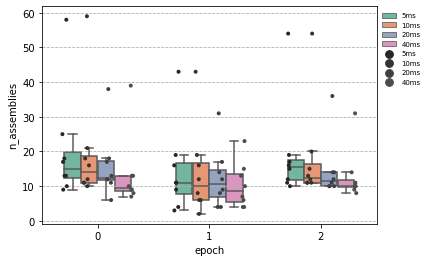

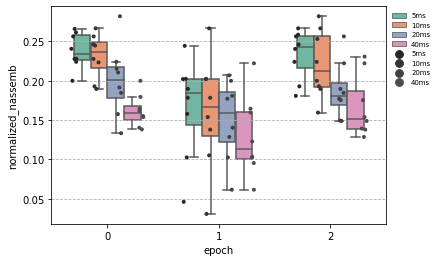

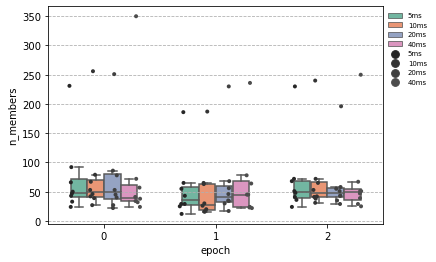

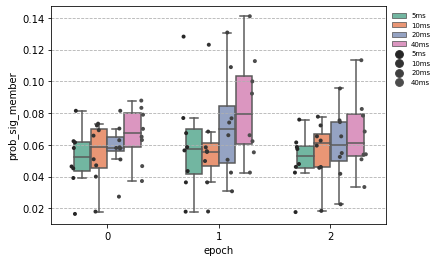

In [11]:
plt.figure()
plt.grid(linestyle='--',zorder=-100)
sns.boxplot(x="epoch", y="n_assemblies", hue='binsize', data=assem_epoch_df,
            width=.6, palette="Set2",showfliers=False)
sns.stripplot(x="epoch", y="n_assemblies",hue='binsize', data=assem_epoch_df,
              size=4, color=".3", linewidth=0, dodge=True)
axs=plt.gca()
axs.legend(loc='best', bbox_to_anchor=(.65, -0.2, 0.5, 1.2),
            fontsize='x-small',frameon=False)


plt.figure()
plt.grid(linestyle='--',zorder=-100)
sns.boxplot(x="epoch", y="normalized_nassemb", hue='binsize', data=assem_epoch_df,
            width=.6, palette="Set2",showfliers=False)
sns.stripplot(x="epoch", y="normalized_nassemb",hue='binsize', data=assem_epoch_df,
              size=4, color=".3", linewidth=0, dodge=True)
axs=plt.gca()
axs.legend(loc='best', bbox_to_anchor=(.65, -0.2, 0.5, 1.2),
            fontsize='x-small',frameon=False)

plt.figure()
plt.grid(linestyle='--',zorder=-100)
sns.boxplot(x="epoch", y="n_members", hue='binsize', data=assem_epoch_df,
            width=.6, palette="Set2",showfliers=False)
sns.stripplot(x="epoch", y="n_members",hue='binsize', data=assem_epoch_df,
              size=4, color=".3", linewidth=0, dodge=True)
axs=plt.gca()
axs.legend(loc='best', bbox_to_anchor=(.65, -0.2, 0.5, 1.2),
            fontsize='x-small',frameon=False)

plt.figure()
plt.grid(linestyle='--',zorder=-100)
sns.boxplot(x="epoch", y="prob_sig_member", hue='binsize', data=assem_epoch_df,
            width=.6, palette="Set2",showfliers=False)
sns.stripplot(x="epoch", y="prob_sig_member",hue='binsize', data=assem_epoch_df,
              size=4, color=".3", linewidth=0, dodge=True)
axs=plt.gca()
axs.legend(loc='best', bbox_to_anchor=(.65, -0.2, 0.5, 1.2),
            fontsize='x-small',frameon=False)

## plot assembly activation strength by overall participation prob. over ripples 

See if, during the novel environment exploration, the first assemblies that appear are the ones formed by high-participation cells as well

of sig members, find mean/median/range/std participation prob per assembly

for assembly strength over time, locate any peak $R >= 5$.